# Description:

##### Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.


##### The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

### Objective:
>Understand the Dataset & cleanup (if required).

>Build classification models to predict whether the cancer type is Malignant or Benign.

>Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.


In [1]:
# import the Dataset from source
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

D:\PythonEnvironment\Anaconda\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\K Tarun\.cache\kagglehub\datasets\yasserh\breast-cancer-dataset\versions\1


In [2]:
cd C:\Users\K Tarun\.cache\kagglehub\datasets\yasserh\breast-cancer-dataset\versions\1

C:\Users\K Tarun\.cache\kagglehub\datasets\yasserh\breast-cancer-dataset\versions\1


D:\PythonEnvironment\Anaconda\envs\myenv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
ls

 Volume in drive C is Acer
 Volume Serial Number is EC9F-7E59

 Directory of C:\Users\K Tarun\.cache\kagglehub\datasets\yasserh\breast-cancer-dataset\versions\1

27-11-2025  11:16    <DIR>          .
27-11-2025  11:16    <DIR>          ..
27-11-2025  11:16           124,571 breast-cancer.csv
               1 File(s)        124,571 bytes
               2 Dir(s)  20,225,581,056 bytes free


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read Data
Data = pd.read_csv(r'C:\Users\K Tarun\.cache\kagglehub\datasets\yasserh\breast-cancer-dataset\versions\1\breast-cancer.csv')

In [5]:
Data.shape

(569, 32)

In [6]:
Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
Data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
Data.describe(include = "all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


<Axes: xlabel='diagnosis', ylabel='count'>

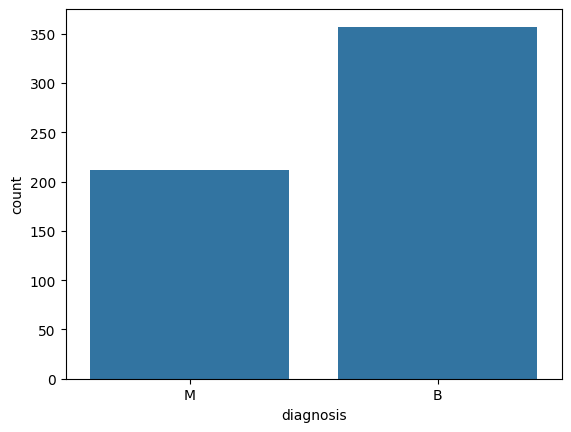

In [9]:
sns.countplot(data =Data,x='diagnosis')

In [10]:
Data.loc[Data['diagnosis']=='M'].describe(include = "all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,2.120000e+02,212,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
unique,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.681805e+07,NaN,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,1.378965e+08,NaN,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,8.670000e+03,NaN,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.613450e+05,NaN,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,8.953665e+05,NaN,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,8.911290e+06,NaN,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625


In [11]:
Data.loc[Data['diagnosis']=='B'].describe(include = "all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.570000e+02,357,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
unique,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.654382e+07,NaN,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.167397e+08,NaN,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,8.913000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.746620e+05,NaN,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,9.089160e+05,NaN,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,8.812816e+06,NaN,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410


In [12]:
Dc = Data.drop(['id','diagnosis'],axis=1)
corr = Dc.corr()

<Axes: >

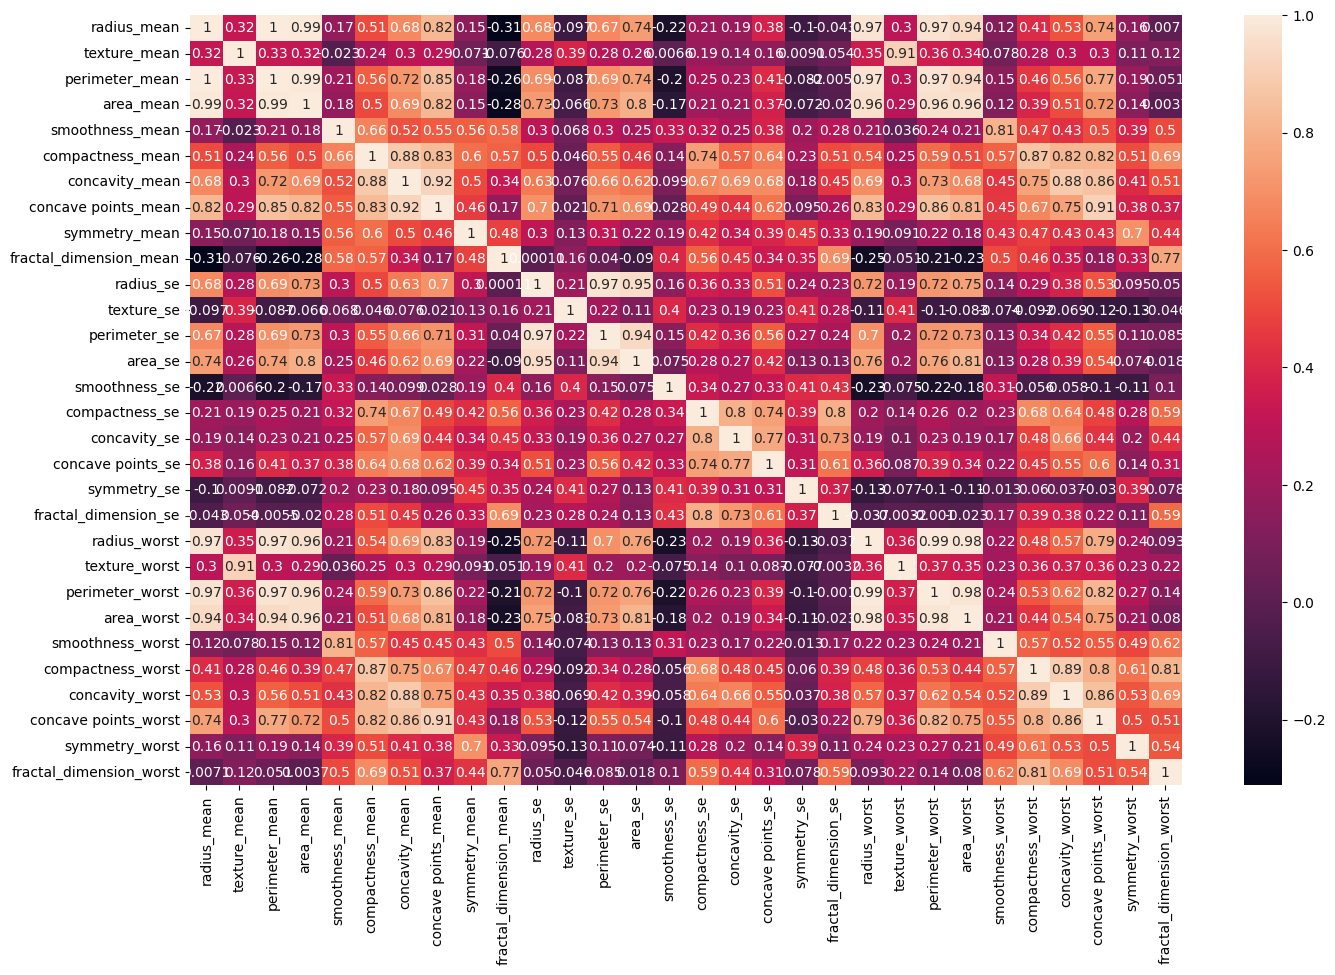

In [13]:
plt.figure(figsize = (16,10))
sns.heatmap(corr,annot=True)

In [14]:
X, y =  Data.drop(['id','diagnosis'],axis=1),Data['diagnosis']
corr_matrix = X.corr().abs()   # absolute correlation values
threshold = 0.8                 # choose threshold for "high" correlation

# Select upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find columns to drop
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop one of each highly-correlated pair


In [15]:
# Drop Highly corelated columns
X_reduced = X.drop(columns=to_drop)
X_reduced.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1234,test_size=.25)

In [19]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [20]:
scaler = StandardScaler()
label_encoder = LabelEncoder()

In [21]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [22]:
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

Logi_reg = LogisticRegression()
Dtc = DecisionTreeClassifier()
Rfc = RandomForestClassifier()
Knn = KNeighborsClassifier()
Xgb = XGBClassifier()

In [24]:
from sklearn.metrics import classification_report

In [25]:
Models = [Logi_reg,Dtc,Rfc,Knn,Xgb]

In [26]:
for model in Models:
    print(f'results {model}')
    model.fit(X_train_std,y_train_enc)
    pred = model.predict(X_test_std)
    print(classification_report(y_test_enc,pred))

results LogisticRegression()
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        88
           1       1.00      0.91      0.95        55

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143

results DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        88
           1       0.89      0.91      0.90        55

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

results RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        88
           1       0.98      0.89      0.93        55

    accuracy                           0.95       143
   macro avg       0.96      0.94

In [27]:
import tensorflow as tf

In [28]:
# BUILD TENSORFLOW MODEL
# -------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_std.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')    # Output layer for binary classification
])

D:\PythonEnvironment\Anaconda\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [30]:
# TRAIN MODEL
# -------------------------
history = model.fit(
    X_train_std, y_train_enc,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5202 - loss: 0.6990 - val_accuracy: 0.8256 - val_loss: 0.5275
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9002 - loss: 0.4477 - val_accuracy: 0.8953 - val_loss: 0.3712
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9305 - loss: 0.3133 - val_accuracy: 0.9419 - val_loss: 0.2620
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9653 - loss: 0.2071 - val_accuracy: 0.9419 - val_loss: 0.1956
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9796 - loss: 0.1399 - val_accuracy: 0.9419 - val_loss: 0.1588
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9701 - loss: 0.1111 - val_accuracy: 0.9535 - val_loss: 0.1353
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9887 - loss: 0.0809 - val_accuracy: 0.9651 - val_loss: 0.1201
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9728 - loss: 0.0863 - val_accuracy: 0.9767 - v

In [31]:
loss, acc = model.evaluate(X_test_std, y_test_enc)
print(f"\nModel Accuracy: {acc:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9674 - loss: 0.2295

Model Accuracy: 0.9580


In [32]:
model2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(32,activation='relu',input_shape=(X_train_std.shape[1],)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(2,activation='sigmoid')
    ]
)

In [33]:
model2.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.FalseNegatives(),
    ],)

In [34]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,554 (6.07 KB)

 Trainable params: 1,554 (6.07 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
cd

C:\Users\K Tarun


D:\PythonEnvironment\Anaconda\envs\myenv\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
D:\PythonEnvironment\Anaconda\envs\myenv\Lib\site-packages\IPython\core\magics\osm.py:428: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [38]:
import mlflow

In [40]:
mlflow.start_run()

2025/12/26 21:55:41 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/26 21:55:41 INFO mlflow.store.db.utils: Updating database tables
2025/12/26 21:55:41 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/26 21:55:41 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/26 21:55:41 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2025/12/26 21:55:41 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2025/12/26 21:55:41 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2025/12/26 21:55:41 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2025/12/26 21:55:41 INFO alembic.runtime.migration: Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2025/12/26 21:55:41 INFO alembic.runtime.migration: Running 

<ActiveRun: >